In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Load the data
data = pd.read_csv('Data/session_results_labelled.csv')


In [4]:
# Data Cleaning and Preprocessing
# Handle missing values
data.fillna(0, inplace=True)


In [5]:
data[(data.quality == 'ok') & (data.leave_session != 'system_problem')].loc[:,['quality', 'leave_session']]

,quality,leave_session
0,ok,0
1,ok,0
2,ok,0
4,ok,0
5,ok,0
...,...,...
7110,ok,0
7111,ok,0
7112,ok,0
7113,ok,0


In [6]:
data['quality'].value_counts()

quality
ok     6952
nok     163
Name: count, dtype: int64

In [7]:
data.set_index('session_group', inplace = True)

In [8]:
categorical = [x for x in data.columns if data[x].dtype == 'O']
categorical

['therapy_name',
 'condition',
 'quality',
 'leave_session',
 'exercise_with_most_incorrect',
 'first_exercise_skipped']

In [9]:
data[categorical].head()

,therapy_name,condition,quality,leave_session,exercise_with_most_incorrect,first_exercise_skipped
session_group,,,,,,
MLi8mxTUh95PVrvfIJ5hzCCmi4k=,knee,post_surgical_acl_reconstruction,ok,0,forward_lunge_standing,0
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=,ankle,ankle_fracture,ok,0,forward_lunge_standing,0
60b64+bHQlGhe+3qAo/9JS/Ajc0=,ankle,foot_fracture,ok,0,0,0
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=,shoulder,muscle_strain,nok,0,0,0
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=,ankle,surgical_anklefracture,ok,0,side_lunge_standing,0


In [10]:
data[categorical].isnull().sum()

therapy_name                    0
condition                       0
quality                         0
leave_session                   0
exercise_with_most_incorrect    0
first_exercise_skipped          0
dtype: int64

In [11]:
for x in categorical:
    print(data[x].value_counts())

therapy_name
ankle          2408
shoulder       2148
knee           1661
elbow           425
low_back        308
hip              94
other            36
neck             26
respiratory       9
Name: count, dtype: int64
condition
ankle_sprain                                 1092
rotator_cuff_tendinopathy                     660
post_surgical_rotator_cuff_reconstruction     551
shoulder_pain                                 406
meniscal_tear_repair                          332
foot_fracture                                 299
knee_osteoarthritis                           289
surgical_anklefracture                        267
muscle_strain                                 266
knee_pain                                     263
ankle_fracture                                239
ligament_injury                               236
other                                         232
traumatic_injury                              168
arm_contusion                                 153
post_surgical_acl_rec

In [12]:
for x in categorical:
    print(data[x].value_counts()/float(len(data)))

therapy_name
ankle          0.338440
shoulder       0.301897
knee           0.233450
elbow          0.059733
low_back       0.043289
hip            0.013212
other          0.005060
neck           0.003654
respiratory    0.001265
Name: count, dtype: float64
condition
ankle_sprain                                 0.153479
rotator_cuff_tendinopathy                    0.092762
post_surgical_rotator_cuff_reconstruction    0.077442
shoulder_pain                                0.057063
meniscal_tear_repair                         0.046662
foot_fracture                                0.042024
knee_osteoarthritis                          0.040618
surgical_anklefracture                       0.037526
muscle_strain                                0.037386
knee_pain                                    0.036964
ankle_fracture                               0.033591
ligament_injury                              0.033169
other                                        0.032607
traumatic_injury               

In [13]:
for x in categorical:
    print(x, 'contains', len(data[x].unique()), 'labels')

therapy_name contains 9 labels
condition contains 51 labels
quality contains 2 labels
leave_session contains 5 labels
exercise_with_most_incorrect contains 110 labels
first_exercise_skipped contains 73 labels


In [14]:
for x in categorical:
    print(x, 'contains', len(data[x].unique()), 'labels')

therapy_name contains 9 labels
condition contains 51 labels
quality contains 2 labels
leave_session contains 5 labels
exercise_with_most_incorrect contains 110 labels
first_exercise_skipped contains 73 labels


In [15]:
print('therapy_name contains', len(data['therapy_name'].unique()), 'labels')
print('condition', len(data['condition'].unique()), 'labels')
print('quality', len(data['quality'].unique()), 'labels')
print('leave_session', len(data['leave_session'].unique()), 'labels')
print('exercise_with_most_incorrect', len(data['exercise_with_most_incorrect'].unique()), 'labels')
print('first_exercise_skipped', len(data['first_exercise_skipped'].unique()), 'labels')

therapy_name contains 9 labels
condition 51 labels
quality 2 labels
leave_session 5 labels
exercise_with_most_incorrect 110 labels
first_exercise_skipped 73 labels


In [16]:
data['therapy_name'].head()

session_group
MLi8mxTUh95PVrvfIJ5hzCCmi4k=        knee
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=       ankle
60b64+bHQlGhe+3qAo/9JS/Ajc0=       ankle
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=    shoulder
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=       ankle
Name: therapy_name, dtype: object

In [17]:
pd.get_dummies(data['therapy_name'], drop_first = True).head()

,elbow,hip,knee,low_back,neck,other,respiratory,shoulder
session_group,,,,,,,,
MLi8mxTUh95PVrvfIJ5hzCCmi4k=,False,False,True,False,False,False,False,False
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=,False,False,False,False,False,False,False,False
60b64+bHQlGhe+3qAo/9JS/Ajc0=,False,False,False,False,False,False,False,False
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=,False,False,False,False,False,False,False,True
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=,False,False,False,False,False,False,False,False


In [18]:
pd.get_dummies(data['therapy_name'], drop_first = True).sum(axis=0)

elbow           425
hip              94
knee           1661
low_back        308
neck             26
other            36
respiratory       9
shoulder       2148
dtype: int64

In [19]:
data['condition'].head()

session_group
MLi8mxTUh95PVrvfIJ5hzCCmi4k=    post_surgical_acl_reconstruction
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=                      ankle_fracture
60b64+bHQlGhe+3qAo/9JS/Ajc0=                       foot_fracture
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=                       muscle_strain
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=              surgical_anklefracture
Name: condition, dtype: object

In [20]:
print('Condition contains', data['condition'].nunique(), 'labels')

Condition contains 51 labels


In [21]:
pd.get_dummies(data['condition'], drop_first = True).head()

,ankle_fracture,ankle_pain,ankle_sprain,ankle_strain,arm_contusion,biceps_tendinopathy,chronic_pain,deconditioning,dislocated_shoulder,elbow_pain,...,surgical_dislocatedshoulder,surgical_femurfracture,surgical_footfracture,surgical_radiusfracture,surgical_tibiafracture,tendinopathy,tibia_fracture,traumatic_injury,ulna_fracture,whiplash
session_group,,,,,,,,,,,,,,,,,,,,,
MLi8mxTUh95PVrvfIJ5hzCCmi4k=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60b64+bHQlGhe+3qAo/9JS/Ajc0=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [22]:
pd.get_dummies(data['condition'], drop_first = True).sum(axis=0)

ankle_fracture                                239
ankle_pain                                     39
ankle_sprain                                 1092
ankle_strain                                   66
arm_contusion                                 153
biceps_tendinopathy                            43
chronic_pain                                   53
deconditioning                                 30
dislocated_shoulder                            80
elbow_pain                                      4
femur_fracture                                 85
fibula_fracture                                 9
foot_fracture                                 299
forearm_contusion                              11
hip_fracture                                   24
hip_osteoarthritis                             13
hip_replacement                                25
humerus_fracture                              124
knee_arthroscopy                              131
knee_osteoarthritis                           289


In [23]:
pd.get_dummies(data['leave_session'], drop_first = True).head()

,other,pain,system_problem,tired
session_group,,,,
MLi8mxTUh95PVrvfIJ5hzCCmi4k=,False,False,False,False
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=,False,False,False,False
60b64+bHQlGhe+3qAo/9JS/Ajc0=,False,False,False,False
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=,False,False,False,False
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=,False,False,False,False


In [24]:
pd.get_dummies(data['leave_session'], drop_first = True).sum(axis=0)

other             85
pain              29
system_problem    11
tired             25
dtype: int64

In [25]:
pd.get_dummies(data['exercise_with_most_incorrect'], drop_first = True).head()

,airplane_standing,arm_circles_with_shoulder_abduction_lying,arm_circles_with_shoulder_abduction_upright,arm_circles_with_shoulder_flexion_lying,arm_circles_with_shoulder_flexion_upright,backward_lunge_standing,bridge_lying,cat_camel_4_point,chair_press_up_sitting,clamshells_lying,...,trunk_extension_with_rotation_sitting,trunk_flexion_sitting,trunk_flexion_standing,trunk_flexion_with_rotation_sitting,trunk_flexion_with_rotation_standing,trunk_rotation_sitting,trunk_side_bending_sitting,trunk_side_bending_standing,unilateral_bridge_lying,wall_sit_standing
session_group,,,,,,,,,,,,,,,,,,,,,
MLi8mxTUh95PVrvfIJ5hzCCmi4k=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60b64+bHQlGhe+3qAo/9JS/Ajc0=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
pd.get_dummies(data['exercise_with_most_incorrect'], drop_first = True).sum(axis=0)

airplane_standing                              108
arm_circles_with_shoulder_abduction_lying        9
arm_circles_with_shoulder_abduction_upright      7
arm_circles_with_shoulder_flexion_lying         13
arm_circles_with_shoulder_flexion_upright        4
                                              ... 
trunk_rotation_sitting                           5
trunk_side_bending_sitting                      25
trunk_side_bending_standing                     24
unilateral_bridge_lying                         92
wall_sit_standing                               65
Length: 109, dtype: int64

In [27]:
pd.get_dummies(data['first_exercise_skipped'], drop_first = True).head()

,airplane_standing,arm_circles_with_shoulder_abduction_upright,arm_circles_with_shoulder_flexion_upright,backward_lunge_standing,bridge_lying,cat_camel_4_point,chair_press_up_sitting,clamshells_lying,climb_a_step_standing,diagonal_1_flexion_upright,...,single_leg_stance_standing,single_leg_stance_with_hip_abduction_standing,squat_standing,stand_to_sit_sitting,straight_leg_raise_lying,trunk_flexion_with_rotation_sitting,trunk_flexion_with_rotation_standing,trunk_rotation_sitting,unilateral_bridge_lying,wall_sit_standing
session_group,,,,,,,,,,,,,,,,,,,,,
MLi8mxTUh95PVrvfIJ5hzCCmi4k=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60b64+bHQlGhe+3qAo/9JS/Ajc0=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [28]:
pd.get_dummies(data['first_exercise_skipped'], drop_first = True).sum(axis=0)

airplane_standing                               3
arm_circles_with_shoulder_abduction_upright     3
arm_circles_with_shoulder_flexion_upright       1
backward_lunge_standing                        18
bridge_lying                                   16
                                               ..
trunk_flexion_with_rotation_sitting             1
trunk_flexion_with_rotation_standing            3
trunk_rotation_sitting                          1
unilateral_bridge_lying                        19
wall_sit_standing                               4
Length: 72, dtype: int64

In [29]:
data.isna().sum()

app_version                      0
therapy_name                     0
condition                        0
pain                             0
fatigue                          0
quality                          0
leave_session                    0
leave_exercise_pain              0
leave_exercise_fatigue           0
leave_exercise_other             0
leave_exercise_tired             0
leave_exercise_system_problem    0
prescribed_repeats               0
training_time                    0
perc_CM                          0
perc_WTE                         0
perc_ITE                         0
perc_GU                          0
perc_OML                         0
perc_WD                          0
perc_WM                          0
number_exercises                 0
number_of_distinct_exercises     0
exercise_with_most_incorrect     0
first_exercise_skipped           0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7115 entries, MLi8mxTUh95PVrvfIJ5hzCCmi4k= to ep8yxE/2L2HTu3mnLJRx2vhFm2c=
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   app_version                    7115 non-null   int64  
 1   therapy_name                   7115 non-null   object 
 2   condition                      7115 non-null   object 
 3   pain                           7115 non-null   float64
 4   fatigue                        7115 non-null   float64
 5   quality                        7115 non-null   object 
 6   leave_session                  7115 non-null   object 
 7   leave_exercise_pain            7115 non-null   int64  
 8   leave_exercise_fatigue         7115 non-null   int64  
 9   leave_exercise_other           7115 non-null   int64  
 10  leave_exercise_tired           7115 non-null   int64  
 11  leave_exercise_system_problem  7115 non-null   int64  
 12  pr

In [31]:
numerical = [x for x in data.columns if data[x].dtype != 'O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['app_version', 'pain', 'fatigue', 'leave_exercise_pain', 'leave_exercise_fatigue', 'leave_exercise_other', 'leave_exercise_tired', 'leave_exercise_system_problem', 'prescribed_repeats', 'training_time', 'perc_CM', 'perc_WTE', 'perc_ITE', 'perc_GU', 'perc_OML', 'perc_WD', 'perc_WM', 'number_exercises', 'number_of_distinct_exercises']


In [32]:
data[numerical].head()

,app_version,pain,fatigue,leave_exercise_pain,leave_exercise_fatigue,leave_exercise_other,leave_exercise_tired,leave_exercise_system_problem,prescribed_repeats,training_time,perc_CM,perc_WTE,perc_ITE,perc_GU,perc_OML,perc_WD,perc_WM,number_exercises,number_of_distinct_exercises
session_group,,,,,,,,,,,,,,,,,,,
MLi8mxTUh95PVrvfIJ5hzCCmi4k=,202623131,6.0,4.0,0,0,0,0,0,245,1005,0.995918,0.0,0.0,0.0,0.0,0.0,0.004082,19,7
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=,202623131,4.0,4.0,0,0,0,0,0,187,1159,0.951872,0.0,0.0,0.0,0.0,0.0,0.048128,22,13
60b64+bHQlGhe+3qAo/9JS/Ajc0=,202623131,4.0,6.0,0,0,0,0,0,120,590,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,10,5
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=,202623131,2.0,2.0,0,0,0,0,0,186,908,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,21,11
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=,202623131,2.0,2.0,0,0,0,0,0,206,1524,0.990291,0.0,0.0,0.0,0.0,0.0,0.009709,18,11


In [33]:
data[numerical].isnull().sum()

app_version                      0
pain                             0
fatigue                          0
leave_exercise_pain              0
leave_exercise_fatigue           0
leave_exercise_other             0
leave_exercise_tired             0
leave_exercise_system_problem    0
prescribed_repeats               0
training_time                    0
perc_CM                          0
perc_WTE                         0
perc_ITE                         0
perc_GU                          0
perc_OML                         0
perc_WD                          0
perc_WM                          0
number_exercises                 0
number_of_distinct_exercises     0
dtype: int64

In [34]:
print(round(data[numerical].describe()), 2)

       app_version    pain  fatigue  leave_exercise_pain  \
count       7115.0  7115.0   7115.0               7115.0   
mean   202954466.0     4.0      3.0                  0.0   
std       270341.0     2.0      2.0                  0.0   
min    202623131.0     0.0      0.0                  0.0   
25%    202623131.0     2.0      2.0                  0.0   
50%    203051191.0     4.0      4.0                  0.0   
75%    203224171.0     4.0      4.0                  0.0   
max    203224171.0    10.0     10.0                 11.0   

       leave_exercise_fatigue  leave_exercise_other  leave_exercise_tired  \
count                  7115.0                7115.0                7115.0   
mean                      0.0                   0.0                   0.0   
std                       0.0                   1.0                   0.0   
min                       0.0                   0.0                   0.0   
25%                       0.0                   0.0                   0.0 

In [35]:
plt.figure(figsize=(15,10))


<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

Text(0, 0.5, 'leave_exercise_pain')

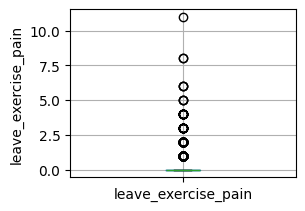

In [36]:
plt.subplot(2, 2, 1)
fig = data.boxplot(column='leave_exercise_pain')
fig.set_title('')
fig.set_ylabel('leave_exercise_pain')


Text(0, 0.5, 'leave_exercise_fatigue')

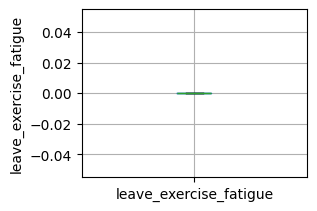

In [37]:
plt.subplot(2, 2, 1)
fig = data.boxplot(column='leave_exercise_fatigue')
fig.set_title('')
fig.set_ylabel('leave_exercise_fatigue')


Text(0, 0.5, 'leave_exercise_other')

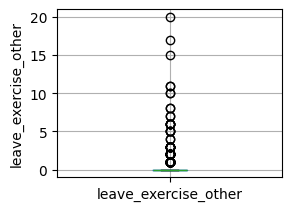

In [38]:
plt.subplot(2, 2, 1)
fig = data.boxplot(column='leave_exercise_other')
fig.set_title('')
fig.set_ylabel('leave_exercise_other')

Text(0, 0.5, 'leave_exercise_tired')

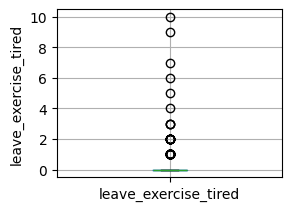

In [39]:
plt.subplot(2, 2, 1)
fig = data.boxplot(column='leave_exercise_tired')
fig.set_title('')
fig.set_ylabel('leave_exercise_tired')

Text(0, 0.5, 'leave_exercise_system_problem')

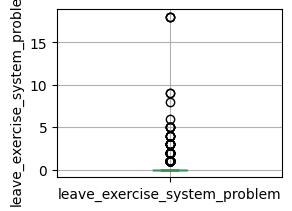

In [40]:
plt.subplot(2, 2, 1)
fig = data.boxplot(column='leave_exercise_system_problem')
fig.set_title('')
fig.set_ylabel('leave_exercise_system_problem')

In [41]:
data['leave_exercise_system_problem'].describe()

count    7115.000000
mean        0.046943
std         0.499412
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.000000
Name: leave_exercise_system_problem, dtype: float64

In [42]:
X = data.drop(['quality'], axis = 1)
y = data['quality']

In [43]:
data.shape, data.shape

((7115, 25), (7115, 25))

In [44]:
data.dtypes

app_version                        int64
therapy_name                      object
condition                         object
pain                             float64
fatigue                          float64
quality                           object
leave_session                     object
leave_exercise_pain                int64
leave_exercise_fatigue             int64
leave_exercise_other               int64
leave_exercise_tired               int64
leave_exercise_system_problem      int64
prescribed_repeats                 int64
training_time                      int64
perc_CM                          float64
perc_WTE                         float64
perc_ITE                         float64
perc_GU                          float64
perc_OML                         float64
perc_WD                          float64
perc_WM                          float64
number_exercises                   int64
number_of_distinct_exercises       int64
exercise_with_most_incorrect      object
first_exercise_s

In [45]:
categorical = [x for x in data.columns if data[x].dtypes == 'O']
categorical

['therapy_name',
 'condition',
 'quality',
 'leave_session',
 'exercise_with_most_incorrect',
 'first_exercise_skipped']

In [46]:
numerical = [x for x in data.columns if data[x].dtypes != 'O']
numerical

['app_version',
 'pain',
 'fatigue',
 'leave_exercise_pain',
 'leave_exercise_fatigue',
 'leave_exercise_other',
 'leave_exercise_tired',
 'leave_exercise_system_problem',
 'prescribed_repeats',
 'training_time',
 'perc_CM',
 'perc_WTE',
 'perc_ITE',
 'perc_GU',
 'perc_OML',
 'perc_WD',
 'perc_WM',
 'number_exercises',
 'number_of_distinct_exercises']

In [47]:
data[numerical].head()

,app_version,pain,fatigue,leave_exercise_pain,leave_exercise_fatigue,leave_exercise_other,leave_exercise_tired,leave_exercise_system_problem,prescribed_repeats,training_time,perc_CM,perc_WTE,perc_ITE,perc_GU,perc_OML,perc_WD,perc_WM,number_exercises,number_of_distinct_exercises
session_group,,,,,,,,,,,,,,,,,,,
MLi8mxTUh95PVrvfIJ5hzCCmi4k=,202623131,6.0,4.0,0,0,0,0,0,245,1005,0.995918,0.0,0.0,0.0,0.0,0.0,0.004082,19,7
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=,202623131,4.0,4.0,0,0,0,0,0,187,1159,0.951872,0.0,0.0,0.0,0.0,0.0,0.048128,22,13
60b64+bHQlGhe+3qAo/9JS/Ajc0=,202623131,4.0,6.0,0,0,0,0,0,120,590,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,10,5
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=,202623131,2.0,2.0,0,0,0,0,0,186,908,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,21,11
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=,202623131,2.0,2.0,0,0,0,0,0,206,1524,0.990291,0.0,0.0,0.0,0.0,0.0,0.009709,18,11


In [48]:
data[categorical].head()

,therapy_name,condition,quality,leave_session,exercise_with_most_incorrect,first_exercise_skipped
session_group,,,,,,
MLi8mxTUh95PVrvfIJ5hzCCmi4k=,knee,post_surgical_acl_reconstruction,ok,0,forward_lunge_standing,0
acZXwWkGEp2pJ+Gp5MyGGE+c9ZY=,ankle,ankle_fracture,ok,0,forward_lunge_standing,0
60b64+bHQlGhe+3qAo/9JS/Ajc0=,ankle,foot_fracture,ok,0,0,0
kBq7O2RKzJ5WolFrGT8OZ3tWZ68=,shoulder,muscle_strain,nok,0,0,0
Lm5xKXnwvIeWua9wGLRrpzz4F+Q=,ankle,surgical_anklefracture,ok,0,side_lunge_standing,0


In [49]:
data[numerical].columns

Index(['app_version', 'pain', 'fatigue', 'leave_exercise_pain',
       'leave_exercise_fatigue', 'leave_exercise_other',
       'leave_exercise_tired', 'leave_exercise_system_problem',
       'prescribed_repeats', 'training_time', 'perc_CM', 'perc_WTE',
       'perc_ITE', 'perc_GU', 'perc_OML', 'perc_WD', 'perc_WM',
       'number_exercises', 'number_of_distinct_exercises'],
      dtype='object')

In [50]:
data[categorical].columns

Index(['therapy_name', 'condition', 'quality', 'leave_session',
       'exercise_with_most_incorrect', 'first_exercise_skipped'],
      dtype='object')

In [51]:
zeros_in_categoricals = (data[categorical] == '0').sum()
zeros_in_categoricals

therapy_name                    0
condition                       0
quality                         0
leave_session                   0
exercise_with_most_incorrect    0
first_exercise_skipped          0
dtype: int64

In [52]:
for col in categorical:
    unique_types = data[col].apply(type).unique()
    print(f"Column '{col}' has types: {unique_types}")

Column 'therapy_name' has types: [<class 'str'>]
Column 'condition' has types: [<class 'str'>]
Column 'quality' has types: [<class 'str'>]
Column 'leave_session' has types: [<class 'int'> <class 'str'>]
Column 'exercise_with_most_incorrect' has types: [<class 'str'> <class 'int'>]
Column 'first_exercise_skipped' has types: [<class 'int'> <class 'str'>]


In [53]:
# Replace both integer 0 and string '0' with NaN
data['first_exercise_skipped'] = data['first_exercise_skipped'].replace([0, '0'], np.nan)
data['leave_session'] = data['leave_session'].replace([0, '0'], np.nan)
data['exercise_with_most_incorrect'] = data['exercise_with_most_incorrect'].replace([0, '0'], np.nan)

# Convert columns to string type to ensure uniformity
data['first_exercise_skipped'] = data['first_exercise_skipped'].astype(str)
data['leave_session'] = data['leave_session'].astype(str)
data['exercise_with_most_incorrect'] = data['exercise_with_most_incorrect'].astype(str)

# Re-identify categorical columns
categorical = [x for x in data.columns if data[x].dtypes == 'O']

# Re-check data types
for col in categorical:
    unique_types = data[col].apply(type).unique()
    print(f"Column '{col}' has types: {unique_types}")


Column 'therapy_name' has types: [<class 'str'>]
Column 'condition' has types: [<class 'str'>]
Column 'quality' has types: [<class 'str'>]
Column 'leave_session' has types: [<class 'str'>]
Column 'exercise_with_most_incorrect' has types: [<class 'str'>]
Column 'first_exercise_skipped' has types: [<class 'str'>]


In [54]:
X = data.drop(['quality'], axis = 1)
y = data['quality']

In [55]:
for col in categorical:
    unique_types = data[col].apply(type).unique()
    print(f"Column '{col}' has types: {unique_types}")

Column 'therapy_name' has types: [<class 'str'>]
Column 'condition' has types: [<class 'str'>]
Column 'quality' has types: [<class 'str'>]
Column 'leave_session' has types: [<class 'str'>]
Column 'exercise_with_most_incorrect' has types: [<class 'str'>]
Column 'first_exercise_skipped' has types: [<class 'str'>]


In [56]:
data['first_exercise_skipped'] = data['first_exercise_skipped'].replace('0', np.nan)
data['leave_session'] = data['leave_session'].replace('0', np.nan)
data['exercise_with_most_incorrect'] = data['exercise_with_most_incorrect'].replace('0', np.nan)


In [57]:
categorical = [x for x in X.columns if data[x].dtypes == 'O']

In [58]:
for col in categorical:
    unique_types = data[col].apply(type).unique()
    print(f"Column '{col}' has types: {unique_types}")

Column 'therapy_name' has types: [<class 'str'>]
Column 'condition' has types: [<class 'str'>]
Column 'leave_session' has types: [<class 'str'>]
Column 'exercise_with_most_incorrect' has types: [<class 'str'>]
Column 'first_exercise_skipped' has types: [<class 'str'>]


In [59]:
for col in categorical:
    unique_types = X[col].apply(type).unique()
    print(f"Column '{col}' has types: {unique_types}")

Column 'therapy_name' has types: [<class 'str'>]
Column 'condition' has types: [<class 'str'>]
Column 'leave_session' has types: [<class 'str'>]
Column 'exercise_with_most_incorrect' has types: [<class 'str'>]
Column 'first_exercise_skipped' has types: [<class 'str'>]


In [60]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)
preprocessor = ColumnTransformer(transformers=[('cat', one_hot_encoder, categorical)], remainder='passthrough')
X_encoded = preprocessor.fit_transform(X)
X_encoded = pd.DataFrame(X_encoded, columns=preprocessor.get_feature_names_out())

In [61]:
X_encoded.head()

,cat__therapy_name_elbow,cat__therapy_name_hip,cat__therapy_name_knee,cat__therapy_name_low_back,cat__therapy_name_neck,cat__therapy_name_other,cat__therapy_name_respiratory,cat__therapy_name_shoulder,cat__condition_ankle_fracture,cat__condition_ankle_pain,...,remainder__training_time,remainder__perc_CM,remainder__perc_WTE,remainder__perc_ITE,remainder__perc_GU,remainder__perc_OML,remainder__perc_WD,remainder__perc_WM,remainder__number_exercises,remainder__number_of_distinct_exercises
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1005.0,0.995918,0.0,0.0,0.0,0.0,0.0,0.004082,19.0,7.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1159.0,0.951872,0.0,0.0,0.0,0.0,0.0,0.048128,22.0,13.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,590.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,10.0,5.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,908.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,21.0,11.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1524.0,0.990291,0.0,0.0,0.0,0.0,0.0,0.009709,18.0,11.0


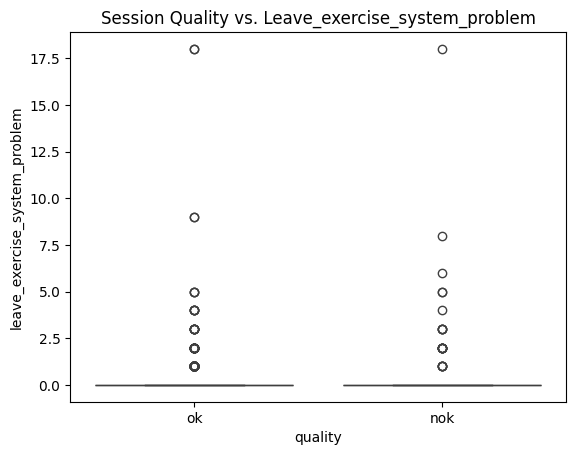

In [62]:
# Feature Engineering
# You may need to create new features or transform existing ones based on domain knowledge

# Data Exploration and Visualization
# Explore the distribution of target variable 'quality'
sns.boxplot(x='quality', y='leave_exercise_system_problem', data=data)
plt.title('Session Quality vs. Leave_exercise_system_problem')
plt.show()


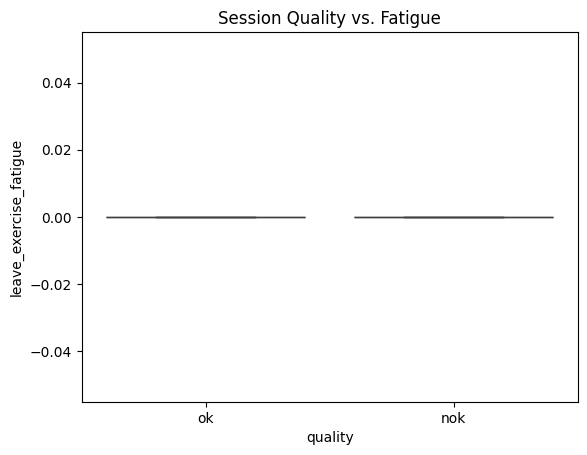

In [63]:
# Explore relationships between features and target variable
# For example, visualize the relationship between 'fatigue' and 'quality'
sns.boxplot(x='quality', y='leave_exercise_fatigue', data=data)
plt.title('Session Quality vs. Fatigue')
plt.show()


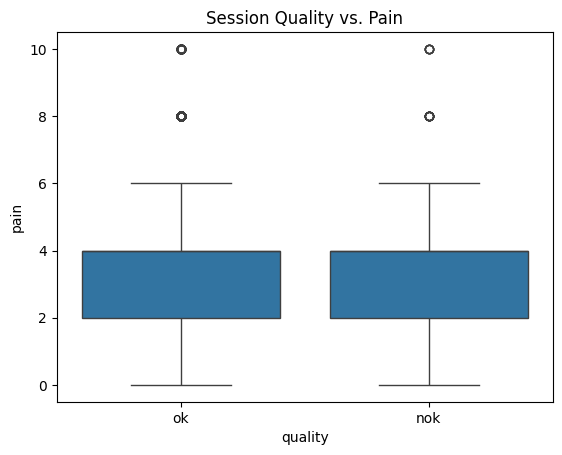

In [64]:
sns.boxplot(x='quality', y='pain', data=data)
plt.title('Session Quality vs. Pain')
plt.show()


In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.2, random_state = 0)

In [66]:
y_train.value_counts()

quality
ok     5558
nok     134
Name: count, dtype: int64

In [67]:
# from imblearn.over_sampling import RandomOverSampler

# oversampler = RandomOverSampler(random_state=42)
# X_resampled, y_resampled = oversampler.fit_resample(X_train, y_train)

In [68]:
# y_resampled.value_counts()

In [69]:
# # Standardize features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [70]:
y_train = y_train.map({'nok': 1, 'ok': 0})

In [71]:

y_test = y_test.map({'nok': 1, 'ok': 0})

In [72]:
# Train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [73]:
from xgboost import XGBClassifier
clf2 = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
clf2.fit(X_train, y_train)

c:\Users\nuosv\AppData\Local\pypoetry\Cache\virtualenvs\sword-challenge-project-tJD-1hXR-py3.11\Lib\site-packages\xgboost\core.py:158: UserWarning: [03:16:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [74]:
# Model Evaluation clf
# Predictions on the test set
y_pred_clf = clf.predict(X_test)

In [75]:
# Model Evaluation clf2
# Predictions on the test set
y_pred_clf2 = clf2.predict(X_test)

In [76]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

# Predict probabilities
y_pred_proba = clf.predict_proba(X_test)[:, 0]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Random Forest ROC AUC Score: {roc_auc}")

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"Threshold: {thresholds}")

Random Forest ROC AUC Score: 0.2380151387720774


In [77]:
from sklearn.metrics import roc_auc_score, precision_recall_curve

# Predict probabilities
y_pred_proba_clf2 = clf2.predict_proba(X_test)[:, 0]

# ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba_clf2)
print(f"XGBoost ROC AUC Score: {roc_auc}")

# Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba_clf2)
# print(f"Precision: {precision}")
# print(f"Recall: {recall}")
# print(f"Threshold: {thresholds}")

XGBoost ROC AUC Score: 0.23893039133231092


In [78]:
# Calculate accuracy Random Forest
accuracy = accuracy_score(y_test, y_pred_clf)
print(f'Random Forest Accuracy: {accuracy}')


Random Forest Accuracy: 0.9796205200281096


In [79]:
# Calculate accuracy XGBoost
accuracy = accuracy_score(y_test, y_pred_clf2)
print(f'XGBoost Accuracy: {accuracy}')


XGBoost Accuracy: 0.9796205200281096


In [80]:
# Classification Report clf
print(classification_report(y_test, y_pred_clf))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1394
           1       0.50      0.07      0.12        29

    accuracy                           0.98      1423
   macro avg       0.74      0.53      0.56      1423
weighted avg       0.97      0.98      0.97      1423



In [81]:
# Classification Report clf2
print(classification_report(y_test, y_pred_clf2))


              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1394
           1       0.50      0.17      0.26        29

    accuracy                           0.98      1423
   macro avg       0.74      0.58      0.62      1423
weighted avg       0.97      0.98      0.97      1423



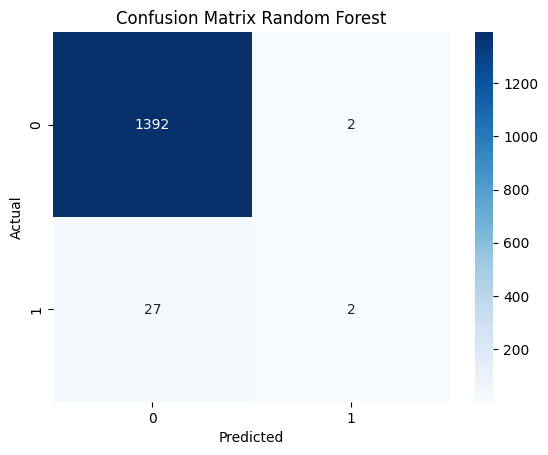

In [82]:
# Confusion Matrix clf
conf_matrix = confusion_matrix(y_test, y_pred_clf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random Forest')
plt.show()

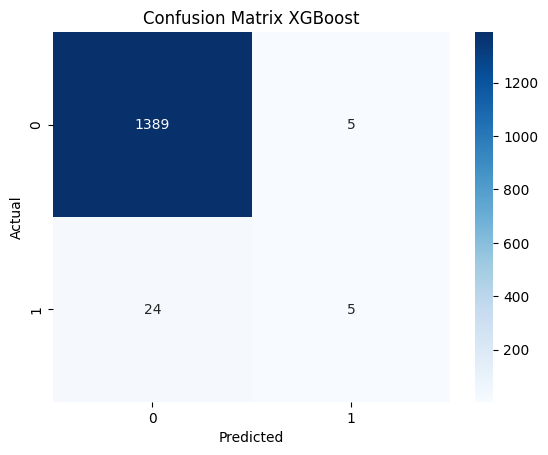

In [83]:
# Confusion Matrix clf
conf_matrix = confusion_matrix(y_test, y_pred_clf2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix XGBoost')
plt.show()

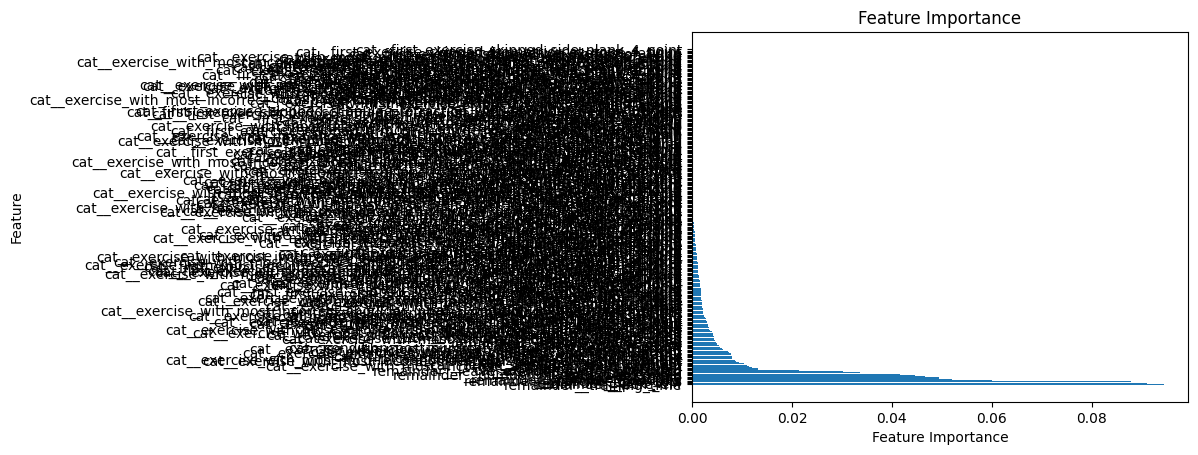

In [84]:
# Feature Importance
feature_importance = clf.feature_importances_
feature_names = X_encoded.columns
sorted_idx = np.argsort(feature_importance)[::-1]
plt.barh(range(X_encoded.shape[1]), feature_importance[sorted_idx], align='center')
plt.yticks(range(X_encoded.shape[1]), feature_names[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

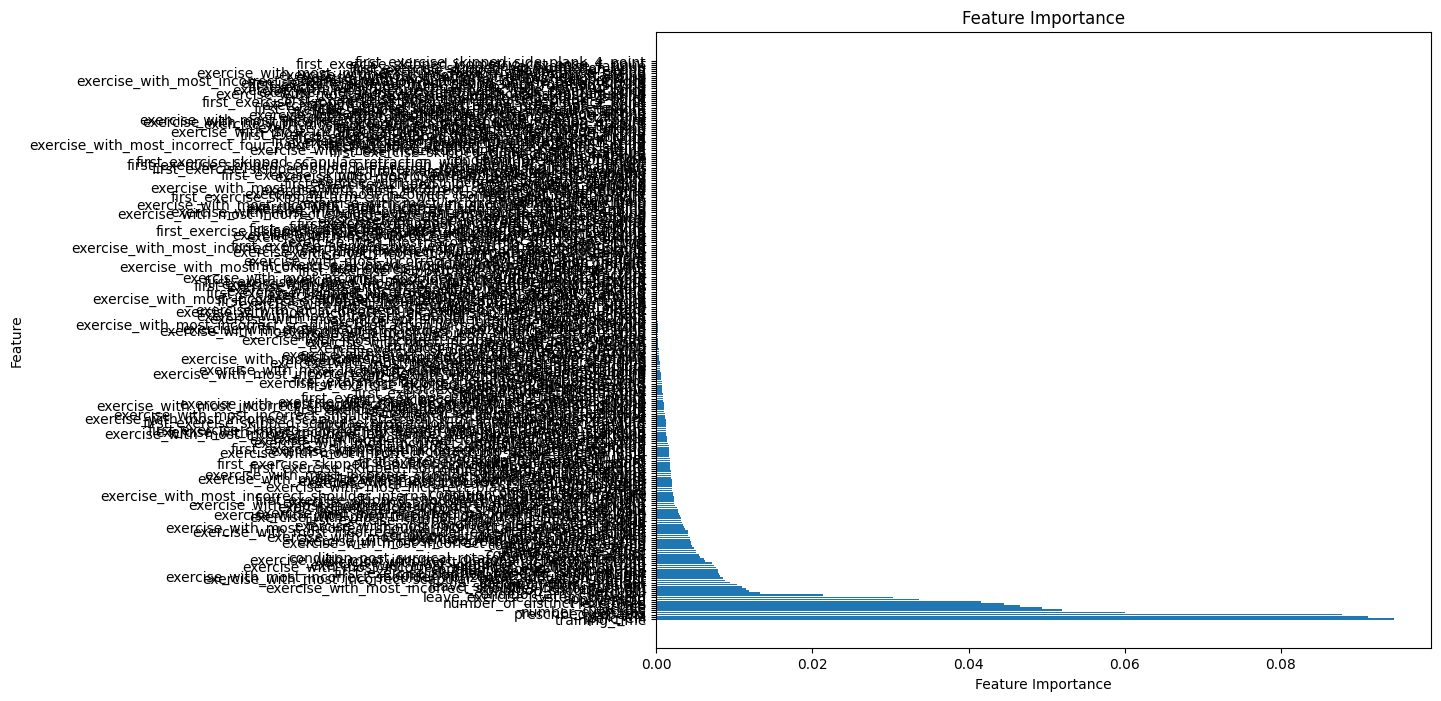

In [89]:
# Extract feature names from the preprocessor
# Get feature names from the one-hot encoding step
onehot_columns = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical)

# Get the non-categorical column names (numeric or other types)
non_categorical_columns = X.drop(columns=categorical).columns

# Combine the one-hot encoded columns with the rest of the columns
all_columns = np.append(onehot_columns, non_categorical_columns)

# Now plot the feature importance using the transformed dataset feature names
feature_importance = clf.feature_importances_
sorted_idx = np.argsort(feature_importance)[::-1]

plt.figure(figsize=(10, 8))
plt.barh(range(len(feature_importance)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(feature_importance)), all_columns[sorted_idx])
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()
